In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc,Rectangle,ConnectionPatch

In [9]:
data = pd.read_excel("Shots.xlsx")
data

,Name,Situation,Result,Team,XSTART,YSTART
0,Aubameyang,OpenPlay,Saved,Arsenal,113,40
1,Aubameyang,Free Kick,Saved,Arsenal,96,51
2,Aubameyang,OpenPlay,Goal,Arsenal,115,41
3,Aubameyang,OpenPlay,Goal,Arsenal,116,39
4,Aubameyang,Free Kick,Goal,Arsenal,95,53
5,Aubameyang,Penalty,Goal,Arsenal,112,40
6,Aubameyang,Penalty,Goal,Arsenal,112,40
7,Aubameyang,Corner,Saved,Arsenal,118,43
8,Aubameyang,Corner,Goal,Arsenal,117,43
9,Aubameyang,Corner,Goal,Arsenal,118,42


In [10]:
def draw_pitch(ax, colour = None, edge = 'black'):
    
    Background = Rectangle([-10,-10], width = 135, height = 95, fill = False)
    # Pitch Outline and Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, fill = False)
    
    if colour:
        Background = Rectangle([-10,-10], width = 135, height = 95, color = colour)
        # Pitch Outline and Centre Line
        Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, facecolor = colour)
    
    # Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,18], width = 18, height = 44, edgecolor = edge, fill = False)
    RightPenalty = Rectangle([102,18], width = 18, height = 44, edgecolor = edge, fill = False)
    midline = ConnectionPatch([60,0], [60,80], 'data', 'data', color = edge)
    
    # Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,30], width = 6, height = 20, edgecolor = edge, fill = False)
    RightSixYard = Rectangle([114,30], width = 6, height = 20, edgecolor = edge, fill = False)
    
    #Goals
    LeftGoal = Rectangle([-3,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    RightGoal = Rectangle([120,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    
    # Prepare Circles
    centreCircle = plt.Circle((60,40), 8.1, color = edge, fill = False)
    centreSpot = plt.Circle((60,40), 0.71, color = edge)
    
    # Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40), 0.71, color = edge)
    rightPenSpot = plt.Circle((108,40), 0.71, color = edge)
    leftArc = Arc((14, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 300, theta2 = 60, color = edge)
    rightArc = Arc((106, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 120, theta2 = 240, color = edge)
    
    element = [Background, Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc, LeftGoal, RightGoal]
    for i in element:
        ax.add_patch(i)

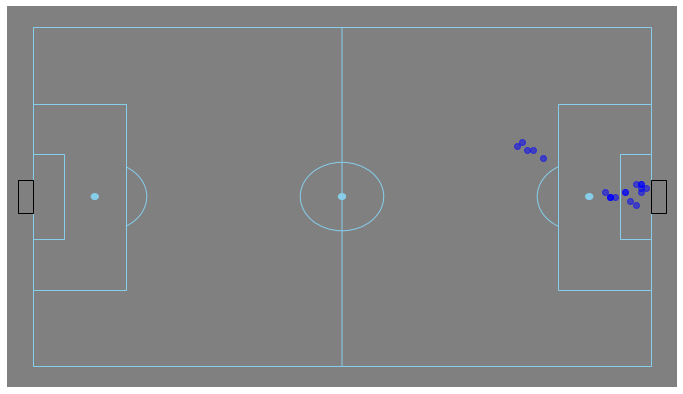

Text(0.5, 1, 'Aubameyang ShotMap')

In [82]:
fig = plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1, 1, 1)
draw_pitch(ax, 'grey', 'skyblue')
plt.ylim(-5, 85)
plt.xlim(-5, 125)
plt.axis('off')
for j in range(len(data)):
    plt.plot(int(data["XSTART"][j]),int(data["YSTART"][j]),"o",color="blue",alpha=0.5)
plt.show()
ax.set_title("Aubameyang ShotMap",size=16)

In [13]:
import seaborn as sns

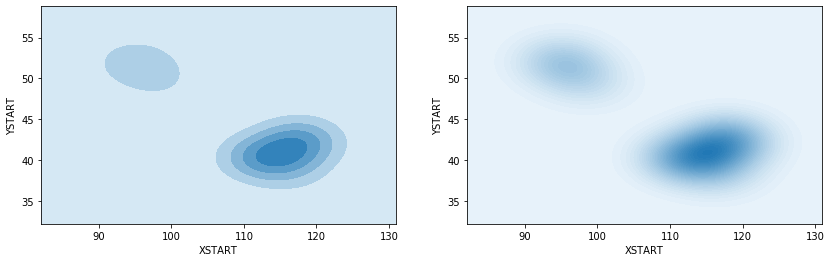

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(14,4)

#Plot One - distinct areas with few lines
plt.subplot(121)
sns.kdeplot(data["XSTART"],data["YSTART"], shade="True", n_levels=5)

#Plot Two - fade lines with more of them
plt.subplot(122)
sns.kdeplot(data["XSTART"],data["YSTART"], shade="True", n_levels=40)

plt.show()

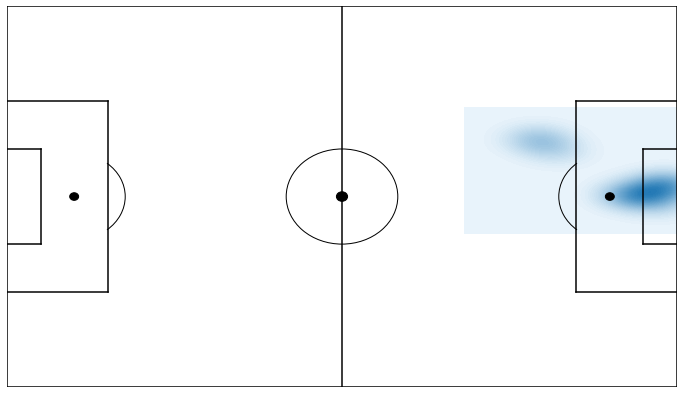

In [81]:
#Create figure
fig=plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Pen Area
plt.plot([0,18],[20,20],color='black')
plt.plot([0,18],[60,60],color='black')
plt.plot([18,18],[20,60],color='black')

#Left 6-yard box
plt.plot([0,6],[30,30],color='black')
plt.plot([0,6],[50,50],color='black')
plt.plot([6,6],[30,50],color='black')


#Right Area Area
plt.plot([120,102],[20,20],color='black')
plt.plot([120,102],[60,60],color='black')
plt.plot([102,102],[20,60],color='black')

#Right 6-yard box
plt.plot([120,114],[30,30],color='black')
plt.plot([120,114],[50,50],color='black')
plt.plot([114,114],[30,50],color='black')

#Circles
centreCircle = plt.Circle([60,40],radius=10,fill=False)
centreSpot = plt.Circle([60,40],radius=1,color='black')
leftPenSpot = plt.Circle([12,40],radius=0.8,color='black')
rightPenSpot = plt.Circle([108,40],radius=0.8,color='black')



#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(data["XSTART"],data["YSTART"], shade=True,n_levels=50)
plt.ylim(0, 80)
plt.xlim(0, 120)


#Display Pitch
plt.show()

#plt.suptitle('Aubameyang Shot HeatMap',size=30,y=1.1)

In [85]:
goal = (data['Result'] == 'Goal')
goal

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16    False
17    False
18     True
19    False
Name: Result, dtype: bool

In [86]:
saved = (data['Result'] == 'Saved')
saved

0      True
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17     True
18    False
19     True
Name: Result, dtype: bool

In [111]:
data['Results'] = data['Result'].apply(lambda x:1 if x=='Goal' else 0)

In [112]:
data.head()

,Name,Situation,Result,Team,XSTART,YSTART,Results
0,Aubameyang,OpenPlay,Saved,Arsenal,113,40,0
1,Aubameyang,Free Kick,Saved,Arsenal,96,51,0
2,Aubameyang,OpenPlay,Goal,Arsenal,115,41,1
3,Aubameyang,OpenPlay,Goal,Arsenal,116,39,1
4,Aubameyang,Free Kick,Goal,Arsenal,95,53,1


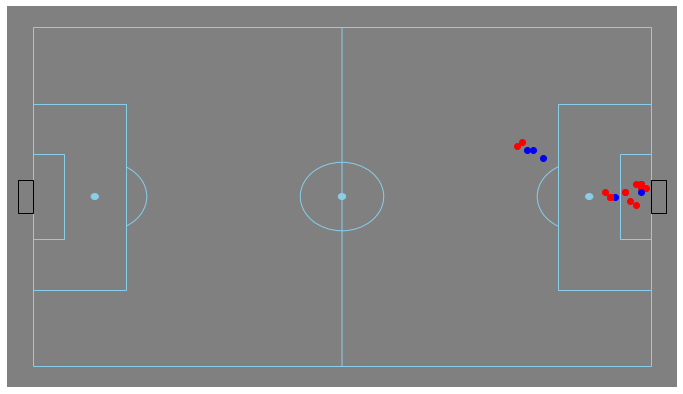

Text(0.5, 1, 'Aubameyang ShotMap')

In [119]:
fig = plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1, 1, 1)
draw_pitch(ax, 'grey', 'skyblue')
plt.ylim(-5, 85)
plt.xlim(-5, 125)
plt.axis('off')
for j in range(len(data)):
    if (data['Result'][j] == 'Goal'):
        plt.plot(int(data['XSTART'][j]),int(data['YSTART'][j]),"o",color='red')
    else:
        plt.plot(int(data['XSTART'][j]),int(data['YSTART'][j]),"o",color='blue')
plt.show()
ax.set_title("Aubameyang ShotMap",size=16)

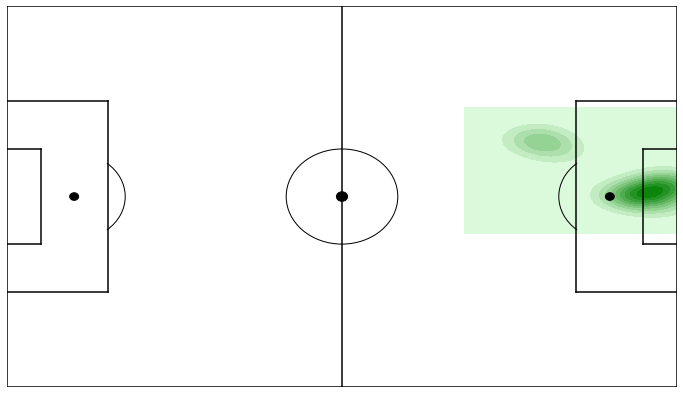

Text(0, 0.5, 'Auba Goals')

In [127]:
#Create figure
fig=plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Pen Area
plt.plot([0,18],[20,20],color='black')
plt.plot([0,18],[60,60],color='black')
plt.plot([18,18],[20,60],color='black')

#Left 6-yard box
plt.plot([0,6],[30,30],color='black')
plt.plot([0,6],[50,50],color='black')
plt.plot([6,6],[30,50],color='black')


#Right Area Area
plt.plot([120,102],[20,20],color='black')
plt.plot([120,102],[60,60],color='black')
plt.plot([102,102],[20,60],color='black')

#Right 6-yard box
plt.plot([120,114],[30,30],color='black')
plt.plot([120,114],[50,50],color='black')
plt.plot([114,114],[30,50],color='black')

#Circles
centreCircle = plt.Circle([60,40],radius=10,fill=False)
centreSpot = plt.Circle([60,40],radius=1,color='black')
leftPenSpot = plt.Circle([12,40],radius=0.8,color='black')
rightPenSpot = plt.Circle([108,40],radius=0.8,color='black')



#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')
for j in range(len(data)):
    if (data['Result'][j] == 'Goal'):
        sns.kdeplot(data['XSTART'],data['YSTART'],shade=True,color='green')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()
ax.set_ylabel("Auba Goals")

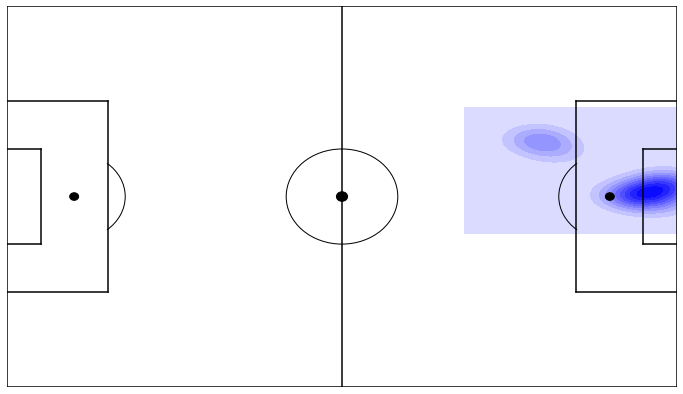

Text(0, 0.5, 'Auba Shots Saved')

In [126]:
#Create figure
fig=plt.figure()
fig.set_size_inches(12, 7)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,80], color="black")
plt.plot([0,120],[80,80], color="black")
plt.plot([120,120],[80,0], color="black")
plt.plot([120,0],[0,0], color="black")
plt.plot([60,60],[0,80], color="black")

#Left Pen Area
plt.plot([0,18],[20,20],color='black')
plt.plot([0,18],[60,60],color='black')
plt.plot([18,18],[20,60],color='black')

#Left 6-yard box
plt.plot([0,6],[30,30],color='black')
plt.plot([0,6],[50,50],color='black')
plt.plot([6,6],[30,50],color='black')


#Right Area Area
plt.plot([120,102],[20,20],color='black')
plt.plot([120,102],[60,60],color='black')
plt.plot([102,102],[20,60],color='black')

#Right 6-yard box
plt.plot([120,114],[30,30],color='black')
plt.plot([120,114],[50,50],color='black')
plt.plot([114,114],[30,50],color='black')

#Circles
centreCircle = plt.Circle([60,40],radius=10,fill=False)
centreSpot = plt.Circle([60,40],radius=1,color='black')
leftPenSpot = plt.Circle([12,40],radius=0.8,color='black')
rightPenSpot = plt.Circle([108,40],radius=0.8,color='black')



#Draw Circles
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Prepare Arcs
leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')
for j in range(len(data)):
    if (data['Result'][j] == 'Saved'):
        sns.kdeplot(data['XSTART'],data['YSTART'],shade=True,color='blue')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()
ax.set_ylabel("Auba Shots Saved")